# Modelling tide with TELEMAC-2D: Normandy beach from Pointe du Hoc to Villers sur mer


Below is the file you will use and the import you will need.

In [1]:
from os import environ, path
import matplotlib.pyplot as plt
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import *
from postel.plot1d import *

# Path to result file
geo_file = path.join(environ['HOMETEL'],'notebooks','workshop','data','r2d_tide-ES_VE95.slf')
bnd_file = path.join(environ['HOMETEL'],'notebooks','workshop','data','geo_plages_Caen_light.cli')

The aim of this example is to plot some results from tide propagation computation.

First, display the computation model (mesh with boundary conditions).

  * Display mesh, mesh with bnd, mesh with liquid bnd
  
  from result file:

  * Display FREE SURFACE for a range of time steps
  
  * Display velocity vectors for a range of time steps
  
  * Display timeseries on a couple of nodes and specific points (see in file for exact points) 
  * Display mesh + points on interest on the same graph
  
  * Display along a polyline ? (Read polyline from shapefile and display mesh + polyline on same plot)
  
  Maybe we add other 2d plot in there (background plot...)
  

## Exo 1

First, display the computation model (mesh with liquid boundary information).

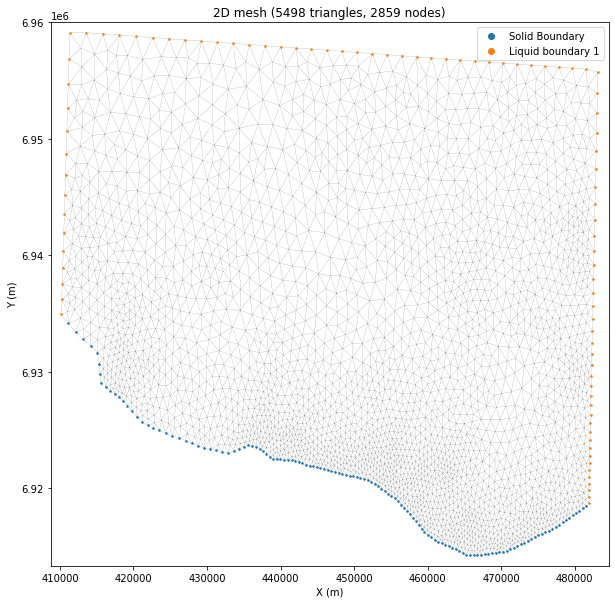

In [2]:
# Initalisaing Telemac file reader
res = TelemacFile(geo_file, bnd_file=bnd_file)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Get liquid boundary info
liq_bnd_info = res.get_liq_bnd_info()

#Plot boundary condition
plot2d_annotate_liq_bnd(ax, res.tri, liq_bnd_info, markersize=1.5, marker='o')
# Plot mesh
plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))

plt.show()
plt.close(fig)

Then, plot the boundary conditions on mesh instead of the liquid boundary information.

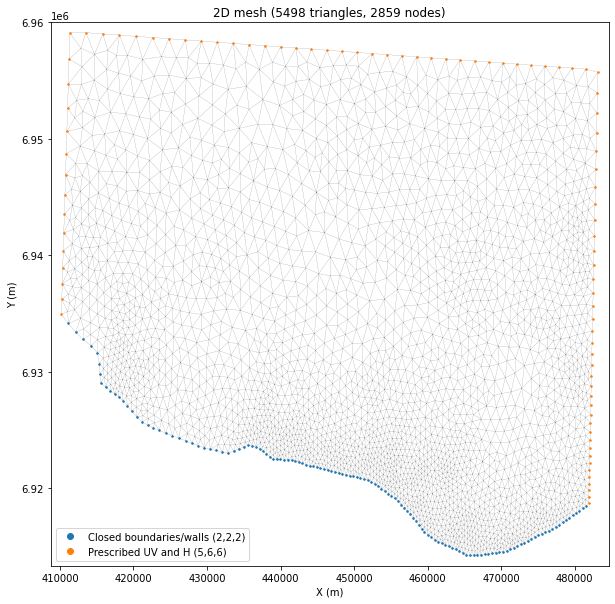

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Get boundary info
bnd_info = res.get_bnd_info()

#Plot boundary condition
plot2d_annotate_bnd(ax, res.tri, bnd_info, markersize=1.5, marker='o')
# Plot mesh
plot2d_triangle_mesh(ax, res.tri,  x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))

plt.show()
##plt.close(fig)

## Exo 2

Now, from the result file, the free surface elevation is displayed at different time steps ().
Plot them all on the same figure (using subplots arguments).

You can see the list of time steps in the file with "res.times".

And "res.varnames" to get the list of variables in the file.

Use a loop to simplify your code.

/home/d60881/telemac-mascaret/scripts/python3/postel/plot2d.py:382: UserWarning: The following kwargs were not used by contour: 'vamx'
  img = axe.tricontourf(mesh, data, levels, cmap=cmap, **kwargs)


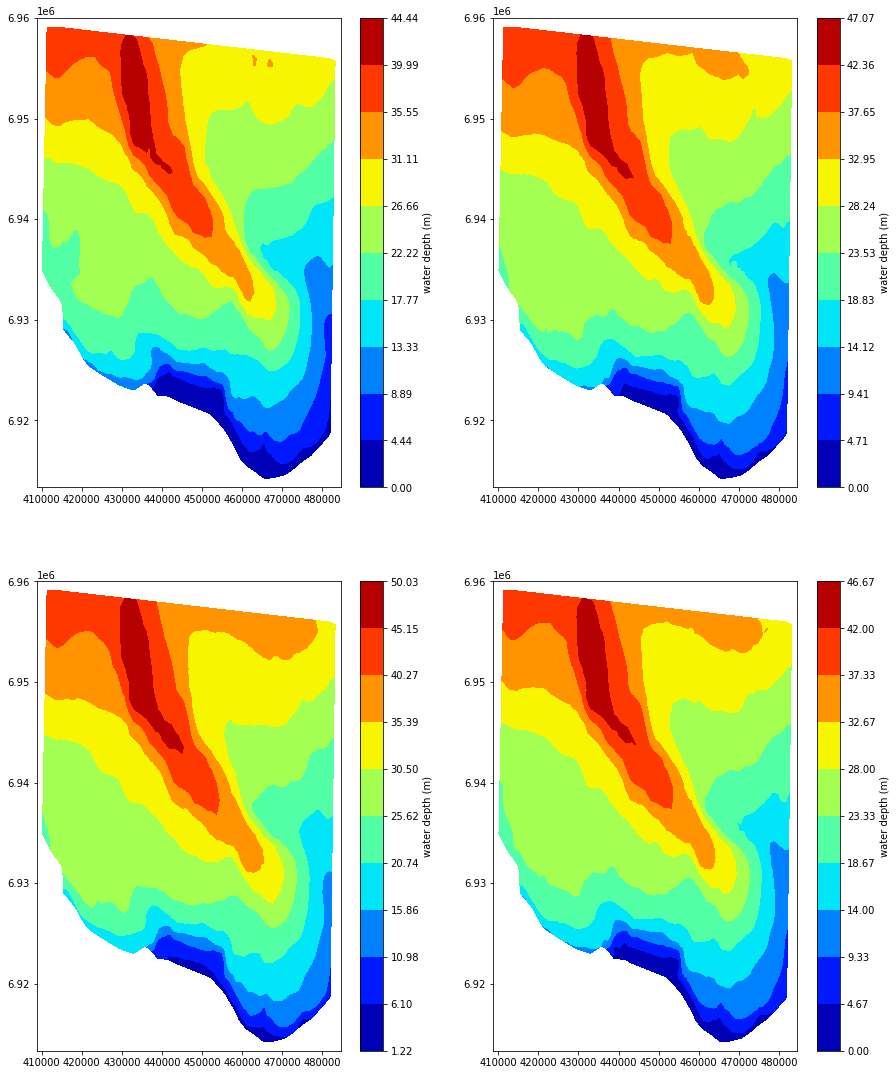

In [4]:
# In the array we put the position of the graph and the record
records = [(0 , 0, 75), 
           (0, 1, 87),
           (1, 0, 100),
           (1, 1, 112)]

fig, axes = plt.subplots(2, 2, figsize=(15, 19))

for i, j, record in records:
    # Plot for i, j
    ax = axes[i, j]
    water_depth = res.get_data_value('WATER DEPTH', record)
    plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, 
                                 data_name='water depth (m)',
                                 vmin=np.min(water_depth),
                                 vamx=np.max(water_depth))

plt.show()
plt.close(fig)

## Exo 4

Now, the velocity field (as vectors) is plot on top of the free surface elevation graph.

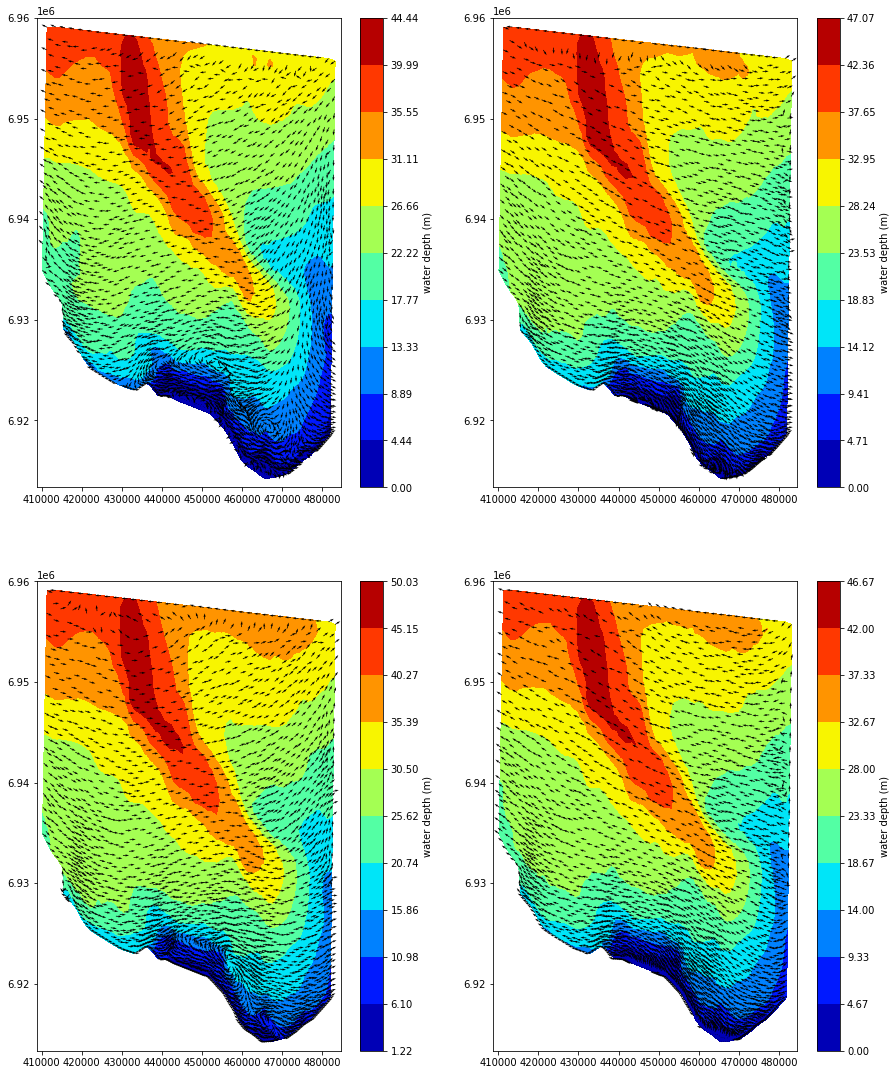

In [5]:
# In the array we put the position of the graph and the record
records = [(0 , 0, 75), 
           (0, 1, 87),
           (1, 0, 100),
           (1, 1, 112)]

fig, axes = plt.subplots(2, 2, figsize=(15, 19))

for i, j, record in records:
    # Plot for i, j
    ax = axes[i, j]
    water_depth = res.get_data_value('WATER DEPTH', record)
    velocity_x = res.get_data_value('VELOCITY U', record)
    velocity_y = res.get_data_value('VELOCITY V', record)
    plot2d_scalar_filled_contour(fig, ax, res.tri, water_depth, 
                                 data_name='water depth (m)',
                                 vmin=np.min(water_depth),
                                 vamx=np.max(water_depth))
    plot2d_vectors(fig, ax, res.tri, 
                   velocity_x, velocity_y, 
                   data_name='velocity (m/s)', color='k')

plt.show()
plt.close(fig)

## Exo 5

Now we would like to extract the timeseries and plot it for the points:

 (448372, 6927804) and (464500, 6916000)

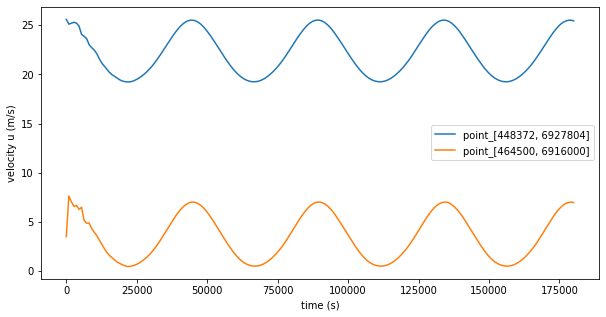

In [6]:

# Getting array of time values from file 
times = res.times

# List of points we what to display
points = [[448372, 6927804], [464500, 6916000]]

# Getting elevation values over time for each point of extraction
data = res.get_timeseries_on_points('WATER DEPTH', points)
#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# for each plot adding a history plot with a label node_(node_number)
for i, point in enumerate(points):
     plot1d(ax, times, data[i,:], 
            x_label='time (s)',
            y_label='velocity u (m/s)', 
            plot_label='point_{}'.format(point))
# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt